Przetwarzanie wybranych transpozonów (sygnałów uzyskanych z DNA walk) poprzez transformację falkową (pakiet PyWavelets), plotowanie uzyskanych współczynników.

In [11]:
from matplotlib import pyplot as plt
import pg
db = pg.DB(dbname="postgres", host="localhost", port=5432, user="postgres", passwd="mlekomleko2")
from pgdb import connect
con = connect(database='postgres', host='localhost:5432', user='postgres', password='mlekomleko2')
import pywt as pwt

In [11]:
print(db.query("select distinct bio.transposon.name from bio.transposon inner join bio.dna_walk on bio.dna_walk.transposon_id = bio.transposon.id"))

                                     name                                     
------------------------------------------------------------------------------
DMMITE_10_3_csa                                                               
DMMITE_25_2_csa                                                               
DMMITE_26_1_csa                                                               
DMMITE_26_2_csa                                                               
DMMITE_27_1_csa                                                               
DMMITE_27_2_csa                                                               
DMMITE_28_1_csa                                                               
DMMITE_4_2_csa                                                                
DMMITE_4_3_csa                                                                
DMMITE_4_4_csa                                                                
DMMITE_4_5_csa                                      

In [21]:
def get_walk (con, tname):
    cursor = con.cursor()

    #transpozony przetłumaczone na sygnały dna walk (tutaj jest limit 1 dla przykładu)
    cursor.execute("select distinct bio.transposon.id from bio.transposon inner join bio.dna_walk on bio.dna_walk.transposon_id = bio.transposon.id where bio.transposon.name = \'"+str(tname)+"\'")

    transposon_row = cursor.fetchone()
    
    if transposon_row is None:
        raise Exception("Transposon not in bio.dna_walk.")
        
    #wybranie sekwencji:
    sequence = con.cursor().execute("select num,x,y from bio.dna_walk where transposon_id = "+str(transposon_row.id)+" order by num asc").fetchall()
    #tworzenie list - sygnałów:
    x = list(map((lambda arg: arg.x), sequence))
    y = list(map((lambda arg: arg.y), sequence))
    cursor.close()
    return (x,y)

In [22]:
def get_dwt_coefs (con, x, y, wavelet='db2',mode='symmetric'):
    
    #transformacja falkowa z podanymi argumentami:
    (xA, xD) = pwt.dwt(x, wavelet=wavelet, mode=mode, axis=-1)
    (yA, yD) = pwt.dwt(y, wavelet=wavelet, mode=mode, axis=-1)

    return (xA,xD,yA,yD)

In [16]:
def plot_dwt (xA, xD, yA, yD, tname):
    xalab, = plt.plot(xA,color="blue", label="X approximate")
    xdlab, = plt.plot(xD,color="red", label="X detail")
    yalab, = plt.plot(yA,color="green", label="Y approximate")
    ydlab, = plt.plot(yD,color="yellow", label="Y detail")
    plt.xlabel('')
    plt.ylabel('Value')
    plt.title('DNA walk DWT coefficients for '+str(tname))
    plt.legend(handles=[xalab,xdlab,yalab,ydlab])
    plt.show()

## RLGypsy_6_2_csa

### DNA walk

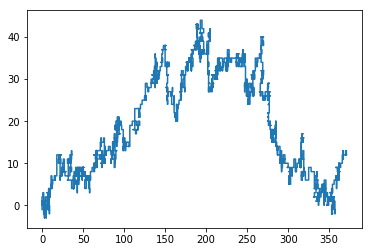

In [24]:
(x,y) = get_walk (con,"RLGypsy_6_2_csa")
plt.plot(x,y)
plt.show()

### Współczynniki transformacji falkowej (?)

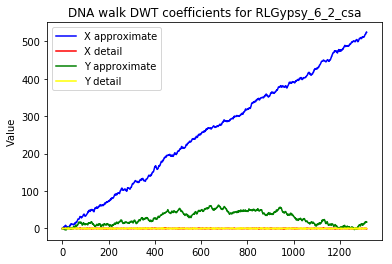

In [25]:
(xA,xD,yA,yD) = get_dwt_coefs (con, x, y)
plot_dwt(xA,xD,yA,yD,"RLGypsy_6_2_csa")

## RLGypsy_6_1_csa

### DNA walk

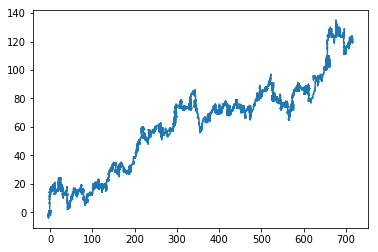

In [26]:
(x,y) = get_walk (con,"RLGypsy_6_1_csa")
plt.plot(x,y)
plt.show()

### Współczynniki transformacji falkowej (?)

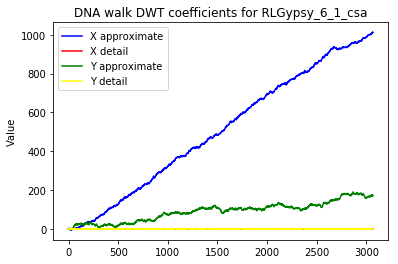

In [27]:
(xA,xD,yA,yD) = get_dwt_coefs (con, x, y)
plot_dwt(xA,xD,yA,yD,"RLGypsy_6_1_csa")

## RLGypsy_5_2_csa

### DNA walk

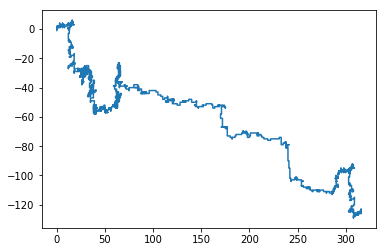

In [30]:
(x,y) = get_walk (con,"RLGypsy_5_2_csa")
plt.plot(x,y)
plt.show()

### Współczynniki transformacji falkowej (?)

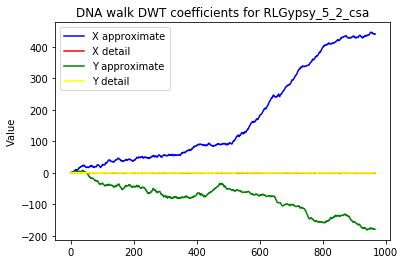

In [31]:
(xA,xD,yA,yD) = get_dwt_coefs (con, x, y)
plot_dwt(xA,xD,yA,yD,"RLGypsy_5_2_csa")

## DMMITE_10_3_csa

### DNA walk

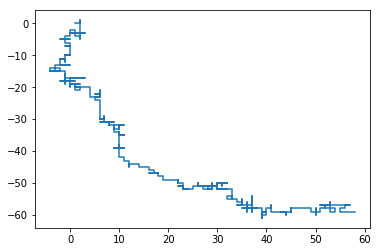

In [28]:
(x,y) = get_walk (con,"DMMITE_10_3_csa")
plt.plot(x,y)
plt.show()

### Współczynniki transformacji falkowej (?)

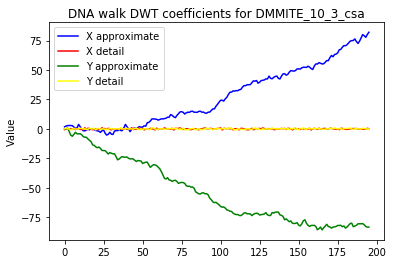

In [29]:
(xA,xD,yA,yD) = get_dwt_coefs (con, x, y)
plot_dwt(xA,xD,yA,yD,"DMMITE_10_3_csa")